In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MPS_Antisocial_Behaviour.csv to MPS_Antisocial_Behaviour.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import chi2_contingency, f_oneway

In [ ]:
data_asb = pd.read_csv('MPS_Antisocial_Behaviour.csv')

<ipython-input-3-685cc5e41f13>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data_asb = pd.read_csv('MPS_Antisocial_Behaviour.csv')


In [ ]:
data_asb.shape

(255432, 27)

In [ ]:
data_asb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255432 entries, 0 to 255431
Data columns (total 27 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Date                                  255432 non-null  object 
 1   Hour                                  255432 non-null  object 
 2   OP01                                  255432 non-null  int64  
 3   Opening_Type_1                        255432 non-null  object 
 4   OP02                                  255016 non-null  object 
 5   Opening_Type_2                        251538 non-null  object 
 6   OP03                                  243850 non-null  object 
 7   Opening_Type_3                        112675 non-null  object 
 8   CL01                                  252785 non-null  object 
 9   Close_Type_1                          252366 non-null  object 
 10  CL02                                  235010 non-null  object 
 11  

Here are total 27 columns and 255432 entries.

In [ ]:
data_asb.head()

,Date,Hour,OP01,Opening_Type_1,OP02,Opening_Type_2,OP03,Opening_Type_3,CL01,Close_Type_1,...,Ward_Code,Response_Time,Duplicate,ASBCount,Datetime,Ward_WardCode,Safer_Neighborhood_Team_Name,Safer_Neighborhood_Team_Code,Safer_Neighborhood_Team_Borough_Name,Safer_Neighborhood_Team_Borough_Code
0,2024-04-07,19:00,215,ASB Nuisance,202,Rowdy Or Inconsiderate Behaviour,,NaN,215,ASB Nuisance,...,NaN,0,No,1,20249,E05013528,North Greenford,E05013528,Ealing,XB
1,2024-04-01,20:00,215,ASB Nuisance,601,Drug Related,,NaN,215,ASB Nuisance,...,NaN,0,No,1,20249,E05011116,South Bermondsey,E05011116,Southwark,MD
2,2024-04-14,16:00,215,ASB Nuisance,202,Rowdy Or Inconsiderate Behaviour,601,Drug Related,215,ASB Nuisance,...,NaN,0,No,1,20249,E05013752,White City,E05013752,Hammersmith and Fulham,FH
3,2024-04-04,18:00,215,ASB Nuisance,202,Rowdy Or Inconsiderate Behaviour,,NaN,215,ASB Nuisance,...,NaN,1431,No,1,20249,E05009378,Hoxton West,E05009378,Hackney,GD
4,2024-04-02,18:00,215,ASB Nuisance,204,Rowdy / Nuisance Neighbours,211,Noise,215,ASB Nuisance,...,NaN,0,No,1,20249,E05013623,Hounslow South,E05013623,Hounslow,TX


In [ ]:
data_asb.describe(include='all')

,Date,Hour,OP01,Opening_Type_1,OP02,Opening_Type_2,OP03,Opening_Type_3,CL01,Close_Type_1,...,Ward_Code,Response_Time,Duplicate,ASBCount,Datetime,Ward_WardCode,Safer_Neighborhood_Team_Name,Safer_Neighborhood_Team_Code,Safer_Neighborhood_Team_Borough_Name,Safer_Neighborhood_Team_Borough_Code
count,255432,255432,255432.000000,255432,255016,251538,243850,112675,252785,252366,...,0.0,2.554320e+05,255432,255432.0,255432.0,252960,252960,252960,252960,252960
unique,366,24,NaN,4,116,114,136,133,59,58,...,NaN,NaN,3,NaN,NaN,679,700,710,33,33
top,2023-10-31,19:00,NaN,ASB Nuisance,202,Rowdy Or Inconsiderate Behaviour,,Drug Related,215,ASB Nuisance,...,NaN,NaN,No,NaN,NaN,E05013806,Euston Town Centre,E0900000702T,Westminster,CW
freq,1406,16973,NaN,219497,145571,145571,131174,35693,170914,170914,...,NaN,NaN,233970,NaN,NaN,2853,1822,1822,14611,14611
mean,NaN,NaN,214.918370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.512667e+03,NaN,1.0,20249.0,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,2.166979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.909032e+04,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,NaN,1.0,20249.0,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,215.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,NaN,1.0,20249.0,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,215.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,NaN,1.0,20249.0,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,215.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.980000e+02,NaN,1.0,20249.0,NaN,NaN,NaN,NaN,NaN


The Hour variable is currently an object type so it will be converted into integer.

In [ ]:
data_asb['Hour'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 255432 entries, 0 to 255431
Series name: Hour
Non-Null Count   Dtype 
--------------   ----- 
255432 non-null  object
dtypes: object(1)
memory usage: 1.9+ MB


In [ ]:
# Here 'Hour' is object so convert it to numeric for easier analysis
data_asb['Hour'] = pd.to_numeric(data_asb['Hour'].str.split(':').str[0], errors='coerce')
# Now hour as an integer

In [ ]:
data_asb['Hour'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 255432 entries, 0 to 255431
Series name: Hour
Non-Null Count   Dtype
--------------   -----
255432 non-null  int64
dtypes: int64(1)
memory usage: 1.9 MB


In [ ]:
#Sorted the variable s with missing value in descending order

missing = data_asb.isnull().sum()
missing_values = missing.to_frame('count')

missing_values.sort_values(by=['count'], ascending=False, inplace=True)
missing_values

,count
Ward_Code,255432
Close_Type_3,255405
Close_Type_2,253450
Resolution_Type_2,235160
Opening_Type_3,142757
CL03,20556
CL02,20422
Ward,20350
OP03,11582
Opening_Type_2,3894


In [ ]:
# Drop columns with too many missing values (e.g., Ward_Code, Close_Type_3)
cols_to_drop = ['Ward_Code', 'Close_Type_3',
                'Close_Type_2', 'Resolution_Type_2',
                'Opening_Type_3',
                'CL03',
                'CL02',
                'OP03' ]
clean_data = data_asb.drop(columns=cols_to_drop)

In [ ]:
# Fill missing values in categorical columns with "Unknown" or other appropriate placeholders
categorical_cols = ['Opening_Type_2',
                    'Ward',
                    'Safer_Neighborhood_Team_Borough_Name',
                    'Ward_WardCode','Safer_Neighborhood_Team_Name',]
clean_data[categorical_cols] = clean_data[categorical_cols].fillna('Unknown')

In [ ]:
clean_data['Date'] = pd.to_datetime(clean_data['Date'], errors='coerce')

In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255432 entries, 0 to 255431
Data columns (total 19 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Date                                  255432 non-null  datetime64[ns]
 1   Hour                                  255432 non-null  int64         
 2   OP01                                  255432 non-null  int64         
 3   Opening_Type_1                        255432 non-null  object        
 4   OP02                                  255016 non-null  object        
 5   Opening_Type_2                        255432 non-null  object        
 6   CL01                                  252785 non-null  object        
 7   Close_Type_1                          252366 non-null  object        
 8   Resolution_Type_1                     252717 non-null  object        
 9   Ward                                  255432 non-null  obje

In [ ]:
clean_data["OP01"]=clean_data["OP01"].astype(str)
print(clean_data.dtypes)

Date                                    datetime64[ns]
Hour                                             int64
OP01                                            object
Opening_Type_1                                  object
OP02                                            object
Opening_Type_2                                  object
CL01                                            object
Close_Type_1                                    object
Resolution_Type_1                               object
Ward                                            object
Response_Time                                    int64
Duplicate                                       object
ASBCount                                         int64
Datetime                                         int64
Ward_WardCode                                   object
Safer_Neighborhood_Team_Name                    object
Safer_Neighborhood_Team_Code                    object
Safer_Neighborhood_Team_Borough_Name            object
Safer_Neig

In [ ]:
clean_data.head()

,Date,Hour,OP01,Opening_Type_1,OP02,Opening_Type_2,CL01,Close_Type_1,Resolution_Type_1,Ward,Response_Time,Duplicate,ASBCount,Datetime,Ward_WardCode,Safer_Neighborhood_Team_Name,Safer_Neighborhood_Team_Code,Safer_Neighborhood_Team_Borough_Name,Safer_Neighborhood_Team_Borough_Code
0,2024-04-07,19,215,ASB Nuisance,202,Rowdy Or Inconsiderate Behaviour,215,ASB Nuisance,Police Attendance Not Required,WA11,0,No,1,20249,E05013528,North Greenford,E05013528,Ealing,XB
1,2024-04-01,20,215,ASB Nuisance,601,Drug Related,215,ASB Nuisance,Inform / Informed,AS45,0,No,1,20249,E05011116,South Bermondsey,E05011116,Southwark,MD
2,2024-04-14,16,215,ASB Nuisance,202,Rowdy Or Inconsiderate Behaviour,215,ASB Nuisance,Linked,AW20,0,No,1,20249,E05013752,White City,E05013752,Hammersmith and Fulham,FH
3,2024-04-04,18,215,ASB Nuisance,202,Rowdy Or Inconsiderate Behaviour,215,ASB Nuisance,Inform / Informed,CE12,1431,No,1,20249,E05009378,Hoxton West,E05009378,Hackney,GD
4,2024-04-02,18,215,ASB Nuisance,204,Rowdy / Nuisance Neighbours,215,ASB Nuisance,Inform / Informed,WA63,0,No,1,20249,E05013623,Hounslow South,E05013623,Hounslow,TX


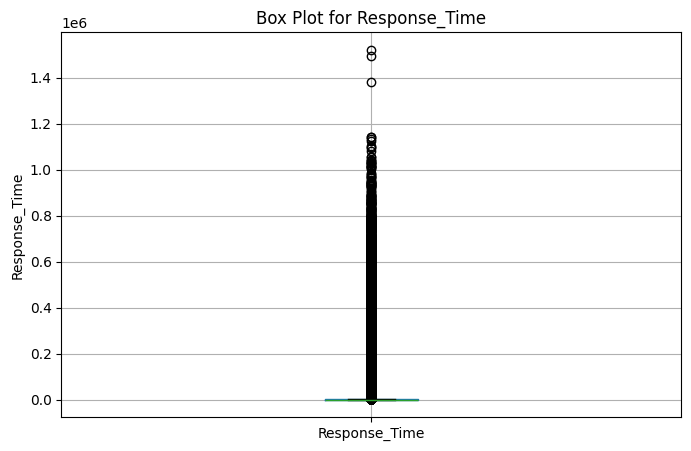

In [ ]:
# Response_Time Boxplot
plt.figure(figsize=(8, 5))
clean_data.boxplot(column='Response_Time')
plt.title('Box Plot for Response_Time')
plt.ylabel('Response_Time')
plt.show()

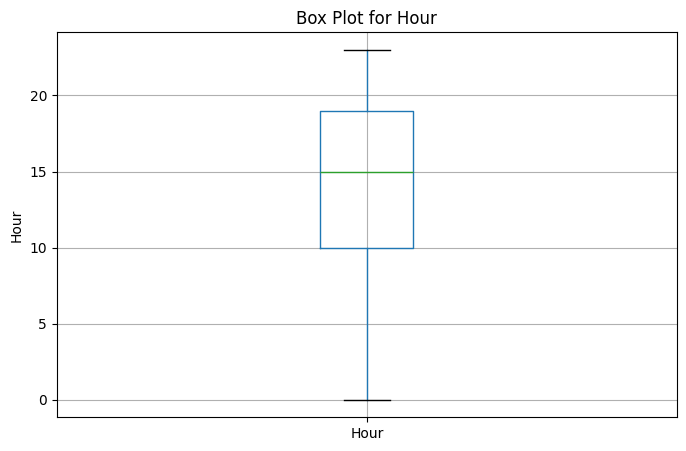

In [ ]:
#Hour Boxplot
plt.figure(figsize=(8, 5))
clean_data.boxplot(column='Hour')
plt.title('Box Plot for Hour')
plt.ylabel('Hour')
plt.show()

In [ ]:
clean_data.describe(include='O').T

,count,unique,top,freq
OP01,255432,4,215,219497
Opening_Type_1,255432,4,ASB Nuisance,219497
OP02,255016,116,202,145571
Opening_Type_2,255432,115,Rowdy Or Inconsiderate Behaviour,145571
CL01,252785,59,215,170914
Close_Type_1,252366,58,ASB Nuisance,170914
Resolution_Type_1,252717,30,Inform / Informed,79582
Ward,255432,684,Unknown,20350
Duplicate,255432,3,No,233970
Ward_WardCode,255432,680,E05013806,2853


In [ ]:
clean_data.describe()

,Date,Hour,Response_Time,ASBCount,Datetime
count,255432,255432.000000,2.554320e+05,255432.0,255432.0
mean,2024-03-06 21:23:21.033543424,13.802859,6.512667e+03,1.0,20249.0
min,2023-09-01 00:00:00,0.000000,0.000000e+00,1.0,20249.0
25%,2023-11-28 00:00:00,10.000000,0.000000e+00,1.0,20249.0
50%,2024-03-14 00:00:00,15.000000,0.000000e+00,1.0,20249.0
75%,2024-06-12 00:00:00,19.000000,5.980000e+02,1.0,20249.0
max,2024-08-31 00:00:00,23.000000,1.521844e+06,1.0,20249.0
std,NaN,6.557410,4.909032e+04,0.0,0.0


**Research Question 1**

Identify the most frequent types of antisocial behaviour

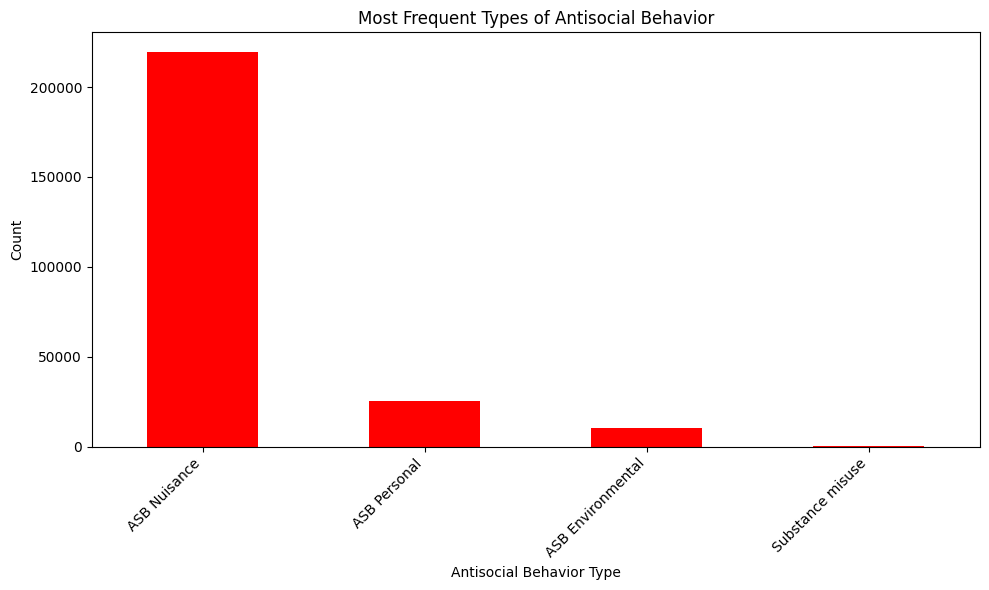

In [ ]:
behavior_counts = clean_data['Opening_Type_1'].value_counts()
plt.figure(figsize=(10, 6))
behavior_counts.plot(kind='bar', color='red')
plt.title('Most Frequent Types of Antisocial Behavior')
plt.xlabel('Antisocial Behavior Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Research Question 2

What are the peak hours of incidents?

In [ ]:
peak_hours = clean_data['Hour'].value_counts().sort_index()

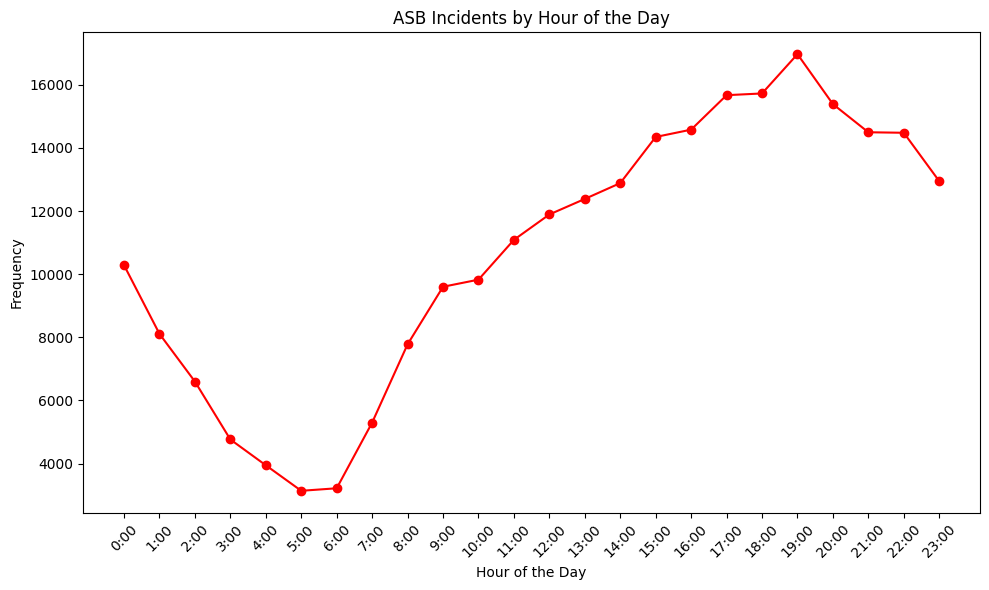

In [ ]:
# Visualization: Most frequent time for antisocial behavior
plt.figure(figsize=(10, 6))
peak_hours.plot(kind='line', marker='o', color='red')
plt.title('ASB Incidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.xticks(range(24), labels=[f'{h}:00' for h in range(24)], rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Analyzing boroughs/areas less comfortable to live in
borough_counts = clean_data['Safer_Neighborhood_Team_Borough_Name'].value_counts()

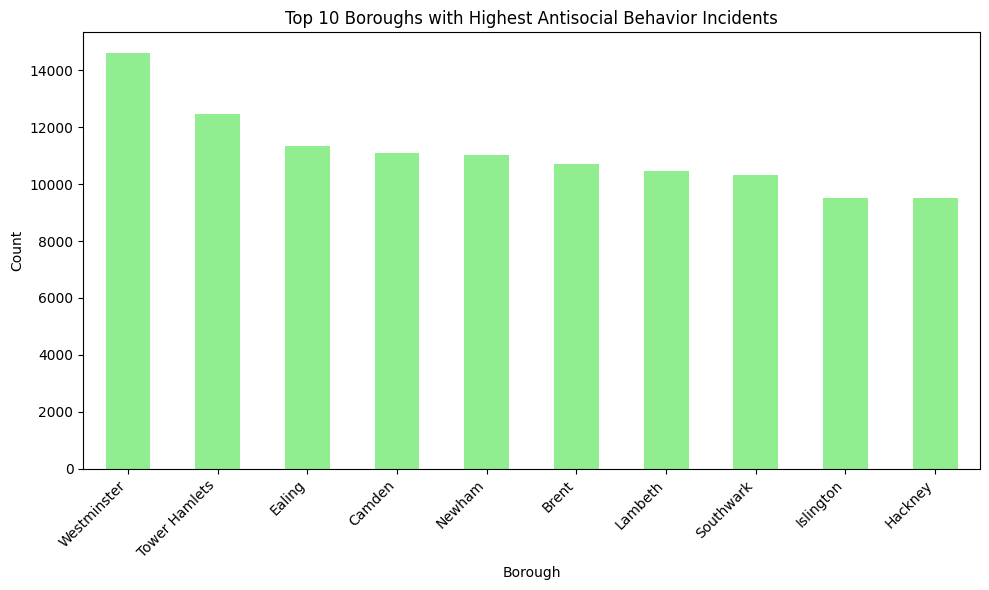

In [ ]:
# Visualization: Top 10 boroughs with the highest ASB incidents
top_boroughs = borough_counts.head(10)
plt.figure(figsize=(10, 6))
top_boroughs.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Boroughs with Highest Antisocial Behavior Incidents')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Research Question 4:

Which day of the week has the most incidents?

In [ ]:
# Analyzing Day of the week with the most incidents
clean_data['Day_of_Week'] = clean_data['Date'].dt.day_name()
day_of_week_counts = clean_data['Day_of_Week'].value_counts()

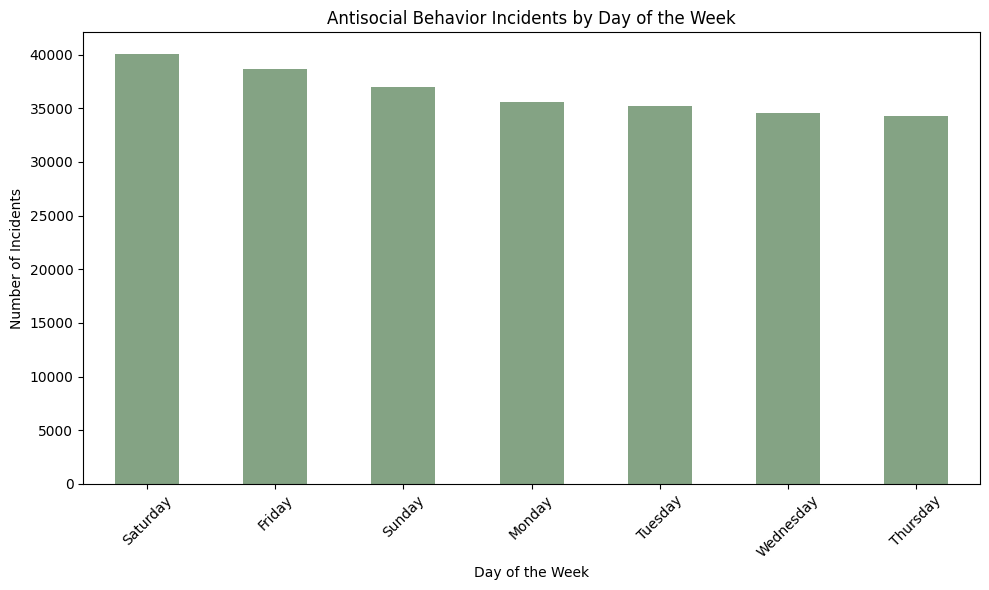

In [ ]:
# Visualization: Incidents by day of the week
color = (0.2, # redness
         0.4, # greenness
         0.2, # blueness
         0.6 # transparency
         )
plt.figure(figsize=(10, 6))
day_of_week_counts.plot(kind='bar', color=color)
plt.title('Antisocial Behavior Incidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Research Question 5:

What is the relationship between ASB types and boroughs?

In [ ]:
# Question 2: Relationship between ASB types and boroughs
asb_borough = clean_data.groupby(['Safer_Neighborhood_Team_Borough_Name', 'Opening_Type_1']).size().unstack()

<Figure size 1200x800 with 0 Axes>

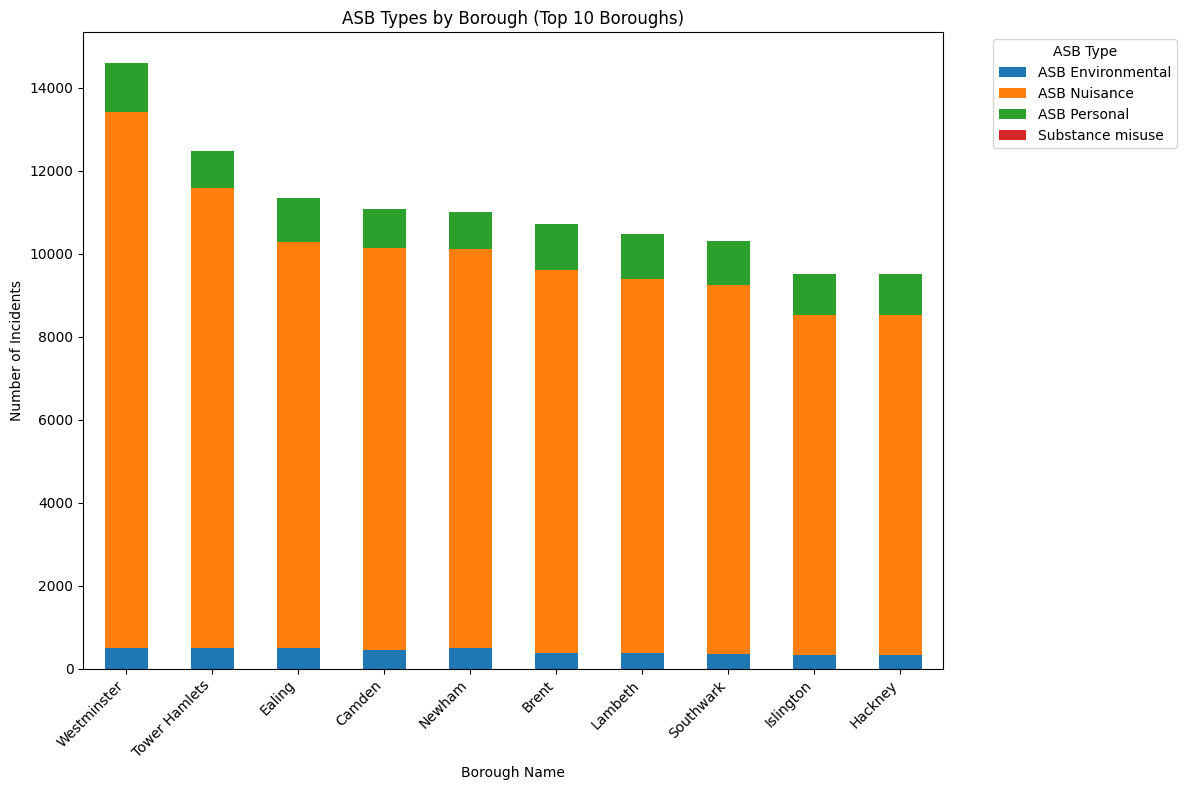

In [ ]:
# Visualization: Heatmap of ASB types by borough (top 10 boroughs)
top_boroughs = borough_counts.head(10).index
asb_borough_top = asb_borough.loc[top_boroughs]

plt.figure(figsize=(12, 8))
asb_borough_top.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('ASB Types by Borough (Top 10 Boroughs)')
plt.xlabel('Borough Name')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='ASB Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Research Question 6:

Are there seasonal variations in antisocial behaviour?¶

In [ ]:
# Question 3: Seasonal variations in antisocial behavior
clean_data['Month'] = clean_data['Date'].dt.month_name()
monthly_counts = clean_data['Month'].value_counts()

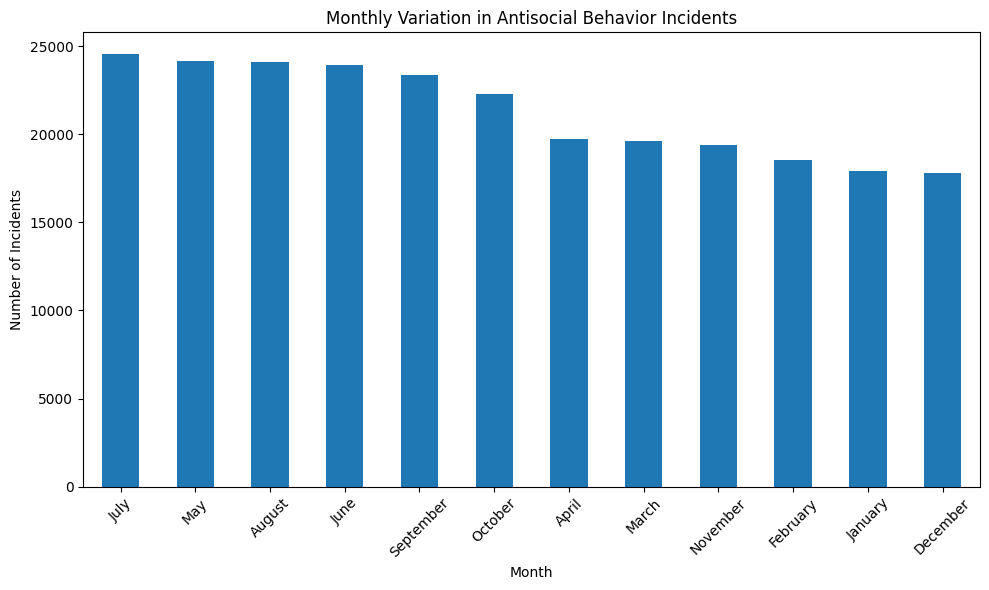

In [ ]:
# Plot: Monthly variation in incidents
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar')
plt.title('Monthly Variation in Antisocial Behavior Incidents')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Hypotheses Testing

Null Hypothesis (H₀):

There is no significant difference in the frequency of antisocial behavior incidents across days of the week.

Alternative Hypothesis (H₁)abs:

There is a significant difference.

In [ ]:
observed_days = day_of_week_counts.values
expected_days = [observed_days.mean()] * len(observed_days)
chi2_stat_day, p_value_day = chi2_contingency([observed_days, expected_days])[:2]

In [ ]:
result = f'"Day of Week (Goodness-of-Fit)":\n"Chi2 Statistic": {chi2_stat_day}, "P-Value": {p_value_day}'
print(result)

"Day of Week (Goodness-of-Fit)":
"Chi2 Statistic": 385.9222486152296, "P-Value": 2.9679694424567733e-80


Result Interpretation:

Since the p-value 2.979906239140796e-36 is much smaller than the conventional significance level of 0.05, I reject the null hypothesis. This means there is very strong evidence to suggest that the frequency of antisocial behavior incidents is not evenly distributed across the days of the week. There's a statistically significant difference in the number of incidents depending on the day of the week.

Hypothesis 1:

Does ASB Type Depend on Borough?

H₀ (Null): ASB types are equally likely across boroughs.

H₁ (Alt): ASB types differ significantly across boroughs.


In [ ]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency = pd.crosstab(clean_data['Opening_Type_1'], clean_data['Safer_Neighborhood_Team_Borough_Name'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-square test statistic: {chi2:.2f}, p-value: {p:.4f}")

Chi-square test statistic: 3512.96, p-value: 0.0000
